### <p style='text-align: center'>  Movie Data Analysis </p> ###

In this notebook, the dataset is stored in **three different** files: 

* Movies containing three columns (movie Id, title, and genres)
* Tags containing four columns, user id, movie id, tag, and timestamp
* ratings containing four columns, user id, movie id, rating, timestamp

I will perform quick data analysis using panda. I will explore the data, clean it, mergy some data, and create plots. 

Example questions answered: 
* What are *five top rated* **comedy** movies released in any year 
* What are the most common tags in movies 
* What are top rated movies in this dataset 
* What are the lowest rated movies 

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('./movies.csv', sep=',')

In [3]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
tags = pd.read_csv('tags.csv', sep=',')

In [6]:
tags.head(3)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079


In [7]:
ratings= pd.read_csv('ratings.csv', sep=',')

In [8]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [10]:
# I do not need timestamp so I will delete it 
del ratings['timestamp']
del tags['timestamp']

In [11]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [12]:
ratings['rating'].min()

0.5

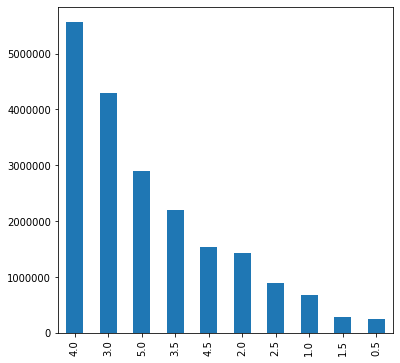

In [19]:
ratings['rating'].value_counts().plot(kind='box', figsize=(6,6))

In [24]:
print('movies shape:', movies.shape )
print('rating shape:', ratings.shape )
print('tags shape:', tags.shape)

movies shape: (27278, 3)
rating shape: (20000263, 3)
tags shape: (465564, 3)


***

##### Data Clearning #####



In [26]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [27]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [28]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [29]:
tag_counts = tags['tag'].value_counts()

In [30]:
tag_counts[:5]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
Name: tag, dtype: int64

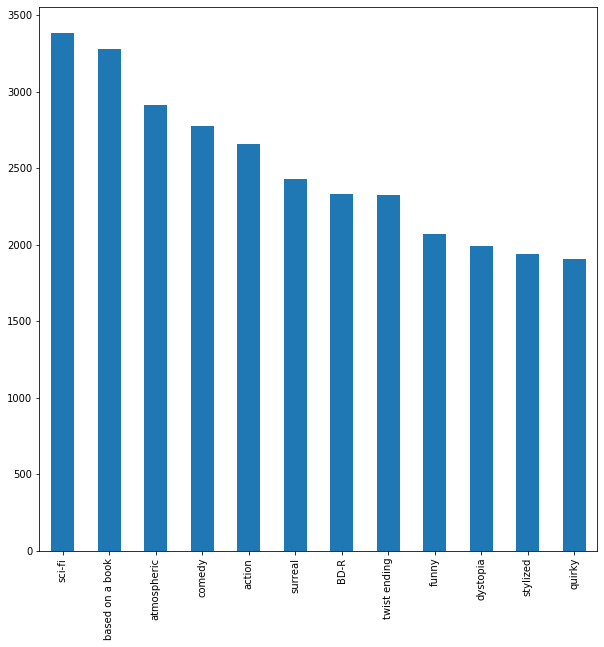

In [33]:
tag_counts[:12].plot(kind='bar', figsize=(10,10))

In [35]:
highly_rated = ratings['rating'] >= 4.5

In [38]:
ratings[highly_rated][:5]

,userId,movieId,rating
30,1,1196,4.5
31,1,1198,4.5
131,1,4993,5.0
142,1,5952,5.0
158,1,7153,5.0


In [39]:
ratings[highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [45]:
rating_count = ratings[['movieId', 'rating']].groupby('rating').count()
rating_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [46]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()

In [47]:
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


***

#### Merging DataFrames ####

In [50]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [53]:
# another way of groupb, alternative to:  ratings[['movieId', 'rating']].groupby('movieId').mean()

avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [52]:
avg_ratings.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [55]:
avg_ratings = ratings.groupby('movieId', as_index=True).mean()
avg_ratings.head()

,userId,rating
movieId,,
1,69282.396821,3.921240
2,69169.928202,3.211977
3,69072.079388,3.151040
4,69652.913280,2.861393
5,69113.475454,3.064592


In [57]:
# let's mergy movies dataframe with average ratings of each movie 

box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,userId,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,79570.0,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570.0,4.0
26741,131258,The Pirates (2014),Adventure,28906.0,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),65409.0,3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,133047.0,4.0


In [58]:
comedy_filter = box_office['genres'].str.contains('Comedy')
box_office[comedy_filter][:5]

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,69282.396821,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,69072.079388,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,69652.913280,2.861393
4,5,Father of the Bride Part II (1995),Comedy,69113.475454,3.064592
6,7,Sabrina (1995),Comedy|Romance,69100.961809,3.366484


In [63]:
# of comedy movies
comedy_filter.value_counts()

False    18512
True      8232
Name: genres, dtype: int64

In [64]:
len(comedy_filter)

26744

In [67]:
highly_rate_filter = box_office['rating']>= 4.5

In [68]:
box_office[comedy_filter & highly_rate_filter][-5:]

,movieId,title,genres,userId,rating
26448,129719,That's Life (1998),Comedy,13965.0,4.50
26496,129905,The Floating Castle (2012),Comedy|Drama,134701.0,5.00
26557,130347,Bill Hicks: Sane Man (1989),Comedy,122319.0,5.00
26647,130970,George Carlin: Life Is Worth Losing (2005),Comedy,77840.5,4.75
26665,131027,But Forever in My Mind (1999),Comedy|Drama,67380.0,4.50


<div class="alert alert-block alert-warning"> High Rated Comedy Movies Released in 2012 </div>

In [80]:
#Comedy, highly rated and modern 
box_office[comedy_filter & highly_rate_filter & box_office['title'].str.contains('2012')]

,movieId,title,genres,userId,rating
21330,103986,Stars in Shorts (2012),Comedy,24034.0,4.5
22398,107906,Lost in Siberia (Ausgerechnet Sibirien) (2012),Comedy|Drama,71328.0,4.5
22859,109715,Inquire Within (2012),Comedy,134593.0,5.0
24618,117537,David et Madame Hansen (2012),Comedy|Drama,93414.0,4.5
25068,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,16144.0,5.0
26185,128506,Rent-a-Cat (2012),Comedy|Drama,59417.0,5.0
26496,129905,The Floating Castle (2012),Comedy|Drama,134701.0,5.0


***

### Vectroized String Operations ###

In [82]:
# Split Genres into multiple columns 

movie_genres = movies['genres'].str.split('|', expand=True)

In [83]:
movie_genres[:3]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None


In [85]:
movie_genres['Comedy'] = movies['genres'].str.contains('Comedy')
movie_genres.head(3)

,0,1,2,3,4,5,6,7,8,9,Comedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True


In [86]:
# Extract year form title

movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


***

In [87]:
#### Average Movie Ratings over Time

In [90]:
average_rating2= ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()

In [91]:
tt = movies.merge(average_rating2, on='movieId', how='inner')
tt.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [92]:
tt.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [94]:
yearly_average = tt[['year', 'rating']].groupby('year', as_index=False).mean()

In [96]:
yearly_average[-5:]

,year,rating
119,2013,3.145056
120,2014,3.122809
121,2015,2.813146
122,"Bicicleta, cullera, poma",3.000000
123,Das Millionenspiel,3.125000


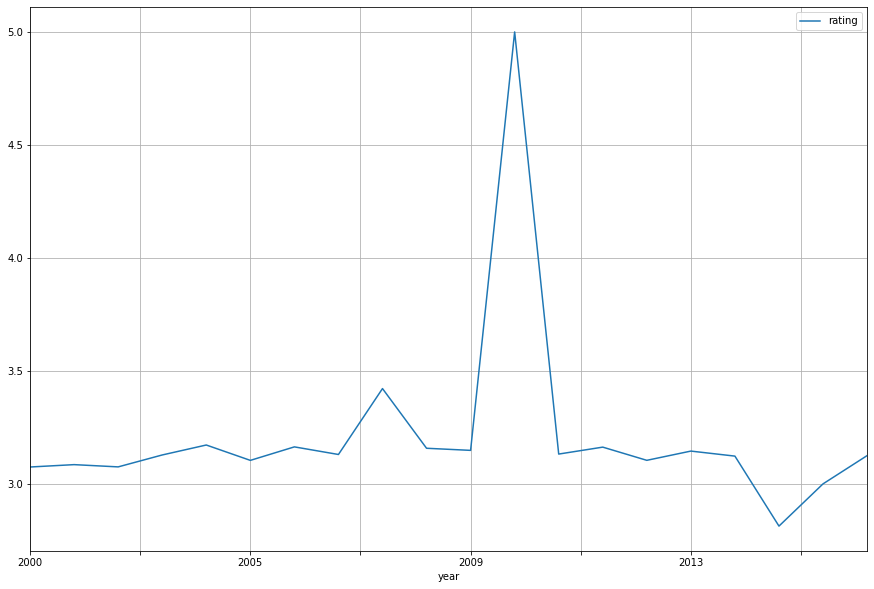

In [100]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)